## Demo: Forcasting Stock Performance in Our Portfolio

This program retrieves stock price data using the Alpaca API and then simulates future performance using Monte Carlo Simulation.

### Import Dependencies

In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret
#alpaca_api_key = "PKR4R1KKK54J9170S059"
#alpaca_secret_key = "fr4sETY9CWUTfCtRoJwXAEXTQV6SOj3gtEhnCyOd"

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)


# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

### Get Past 3 Year's Worth of Microsoft and Coca-Cola Stock Price Data via Alpaca API Call

In [155]:
from alpaca_trade_api.rest import REST, TimeFrame

tickers = ['KO', 'MSFT']

ticker_name = 'MSFT'
df_ticker = api.get_bars(ticker_name, TimeFrame.Day, "2020-03-08", "2022-03-08", adjustment='raw').df
df_ticker.index = df_ticker.index.date
df_ticker=df_ticker[['close']]
df_ticker

,close
2020-03-09,150.62
2020-03-10,160.92
2020-03-11,153.63
2020-03-12,139.06
2020-03-13,158.83
...,...
2022-03-02,300.19
2022-03-03,295.92
2022-03-04,289.86
2022-03-07,278.91


In [156]:
ticker_name = 'MSFT'
micolumns = pd.MultiIndex.from_tuples(
    [(ticker_name, "close")]
)
df_ticker.columns = micolumns
df_ticker

,MSFT
,close
2020-03-09,150.62
2020-03-10,160.92
2020-03-11,153.63
2020-03-12,139.06
2020-03-13,158.83
...,...
2022-03-02,300.19
2022-03-03,295.92
2022-03-04,289.86


## This Below Code works for 1 Stock.
 
```
ticker_name = 'MSFT'
micolumns = pd.MultiIndex.from_tuples(
    [(ticker_name, "close")]
)
df_ticker.columns = micolumns
df_ticker
```
## So - I’ve tweaked this - to work for multiple stocks
```
#Manipulating the DF to work with the MCSimulation function

#First define the List of Tickers
ticker_name = ['MSFT','AAPL']
# or alternative code: ticker_name=df_ticker.columns

#Use List Comprehension to convert it to tuples
ticker_name = [(x,'close') for x in ticker_name]

#optionally check if this worked
print(f"\n ticker_name \n {ticker_name}")

#Now use the MultiIndex.from_tuples to pass this list of Tuples
micolumns = pd.MultiIndex.from_tuples(ticker_name)

df_ticker.columns = micolumns
pivottable
```

In [49]:
pct_changes = df_ticker.pct_change()
pct_changes.dropna(inplace=True)
pct_changes.index = pd.to_datetime(pct_changes.index)
pct_changes

,MSFT
,close
2020-03-10,0.068384
2020-03-11,-0.045302
2020-03-12,-0.094838
2020-03-13,0.142169
2020-03-16,-0.147390
...,...
2022-03-02,0.017766
2022-03-03,-0.014224
2022-03-04,-0.020479


<AxesSubplot:>

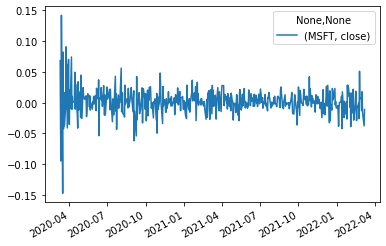

In [50]:
pct_changes.plot()

/Users/armandoordorica/opt/anaconda3/envs/alpacaenv/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

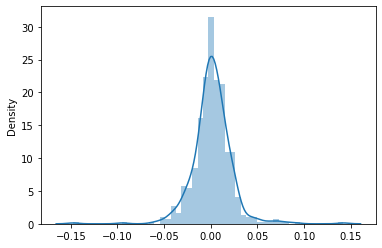

In [52]:
import seaborn as sns
sns.distplot(pct_changes)

In [75]:
initial_price = df_ticker.iloc[-1].values[0]
initial_price

275.85

In [63]:
possible_changes = list(pct_changes['MSFT']['close'].values)
possible_changes[0:10]

[0.06838401274731098,
 -0.0453020134228187,
 -0.09483824773807192,
 0.14216884797928953,
 -0.1473902915066425,
 0.08233643479545116,
 -0.04209592686088548,
 0.016452991452991395,
 -0.03755868544600949,
 -0.009974517655624404]

In [68]:
from random import sample
  

current_pct_change = sample(possible_changes,1)[0]
current_pct_change

0.02446010196482784

In [70]:
current_price = intial_price * ( 1+ current_pct_change)
current_price

282.5973191269978

In [71]:
current_pct_change = sample(possible_changes,1)[0]
current_pct_change

-0.005314832846478379

In [72]:
current_price = current_price * (1+ current_pct_change)
current_price

281.0953616129749

In [73]:
num_days = 252

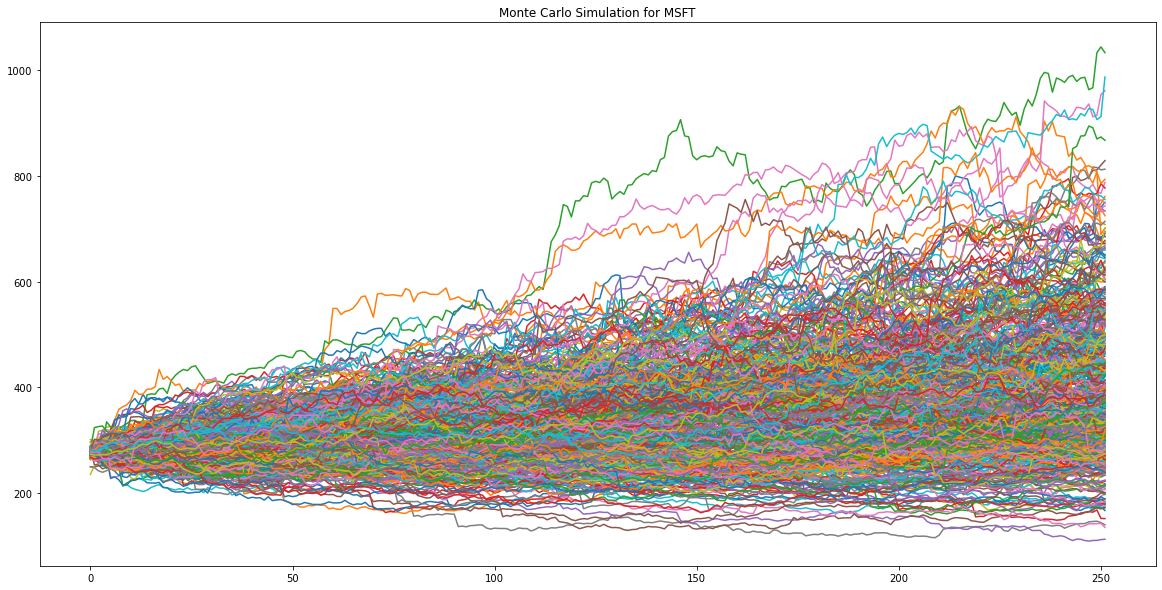

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

realizations = []
for i in range(0, 500): 
    
    current_price = initial_price 
    current_price_history = []
    for i in range(num_days): 
        current_pct_change = sample(possible_changes,1)[0]
        current_price = current_price * (1+ current_pct_change)
        current_price_history.append(current_price)
     

    plt.plot(current_price_history)
    plt.title("Monte Carlo Simulation for MSFT")
    
    realizations.append(current_price_history)

708.1319595194594

/Users/armandoordorica/opt/anaconda3/envs/alpacaenv/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

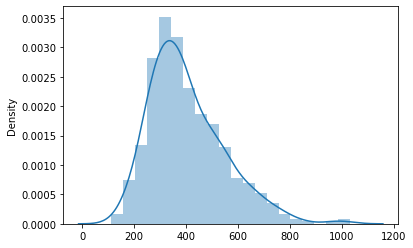

In [99]:
closing_prices_as_of_last_day = [x[-1] for x in realizations]
closing_prices_as_of_last_day

sns.distplot(closing_prices_as_of_last_day)

In [102]:
expected_return = (np.mean(closing_prices_as_of_last_day) - initial_price)/initial_price
expected_return

0.4666020722745766

In [104]:
np.mean(closing_prices_as_of_last_day)

404.562181636942

113.45038570904018

In [111]:
upper_bound

695.6739775648439

In [116]:
def get_data(ticker_name, start_date, end_date):   
    df_ticker = api.get_bars(ticker_name, TimeFrame.Day, start_date, end_date, adjustment='raw').df
    df_ticker.index = df_ticker.index.date
    df_ticker=df_ticker[['close']]
    
    return df_ticker

In [143]:
msft = get_data('MSFT', '2021-03-01', '2022-03-01')
msft


,close
2021-03-01,236.94
2021-03-02,233.87
2021-03-03,227.56
2021-03-04,226.73
2021-03-05,231.60
...,...
2022-02-23,280.27
2022-02-24,294.59
2022-02-25,297.31
2022-02-28,298.79


In [144]:
aapl = get_data('AAPL', '2021-03-01', '2022-03-01')
aapl

,close
2021-03-01,127.79
2021-03-02,125.12
2021-03-03,122.06
2021-03-04,120.13
2021-03-05,121.42
...,...
2022-02-23,160.07
2022-02-24,162.74
2022-02-25,164.85
2022-02-28,165.12


In [147]:
msft['mixed'] = aapl['close'] + msft['close']
msft['mixed']

msft

,close,mixed
2021-03-01,236.94,364.73
2021-03-02,233.87,358.99
2021-03-03,227.56,349.62
2021-03-04,226.73,346.86
2021-03-05,231.60,353.02
...,...,...
2022-02-23,280.27,440.34
2022-02-24,294.59,457.33
2022-02-25,297.31,462.16
2022-02-28,298.79,463.91


In [118]:
df = get_data('MSFT', '2021-03-01', '2022-03-01')
df

,close
2021-03-01,236.94
2021-03-02,233.87
2021-03-03,227.56
2021-03-04,226.73
2021-03-05,231.60
...,...
2022-02-23,280.27
2022-02-24,294.59
2022-02-25,297.31
2022-02-28,298.79


In [140]:
from random import sample

def plot_MC(ticker, start_date, end_date, num_days=10): 
    df = get_data(ticker, start_date, end_date)
    initial_price = df.iloc[-1].values[0]
    
    pct_changes = df.pct_change()
    pct_changes.dropna(inplace=True)
    pct_changes.index = pd.to_datetime(pct_changes.index)
    
    possible_changes = list(pct_changes['close'].values)
    

    plt.figure(figsize=(20,10))

    realizations = []
    for i in range(0, 500): 

        current_price = initial_price 
        current_price_history = []
        for i in range(num_days): 
            current_pct_change = sample(possible_changes,1)[0]
            current_price = current_price * (1+ current_pct_change)
            current_price_history.append(current_price)


        plt.plot(current_price_history)
        plt.title(f"Monte Carlo Simulation for {ticker}")

        realizations.append(current_price_history)
        
    plt.show()
    
    closing_prices_as_of_last_day = [x[-1] for x in realizations]
    expected_return = (np.mean(closing_prices_as_of_last_day) - initial_price)/initial_price
    low_bound =  np.mean(closing_prices_as_of_last_day)  - 2*np.std(closing_prices_as_of_last_day)
    upper_bound =  np.mean(closing_prices_as_of_last_day)  + 2*np.std(closing_prices_as_of_last_day)

    print(f"The starting closing price at the end of this period was {initial_price}")
    print(f"The expected return on {ticker} is {expected_return} and the closing price will be between \
            {low_bound} and {upper_bound} with 95% confidence in the next {num_days} trading days")
    
    low_bound =  np.mean(closing_prices_as_of_last_day)  - 1*np.std(closing_prices_as_of_last_day)
    upper_bound =  np.mean(closing_prices_as_of_last_day)  + 1*np.std(closing_prices_as_of_last_day)
    
    print(f"The starting closing price at the end of this period was {initial_price}")
    print(f"The expected return on {ticker} is {expected_return} and the closing price will be between \
            {low_bound} and {upper_bound} with 67% confidence in the next {num_days} trading days")


    

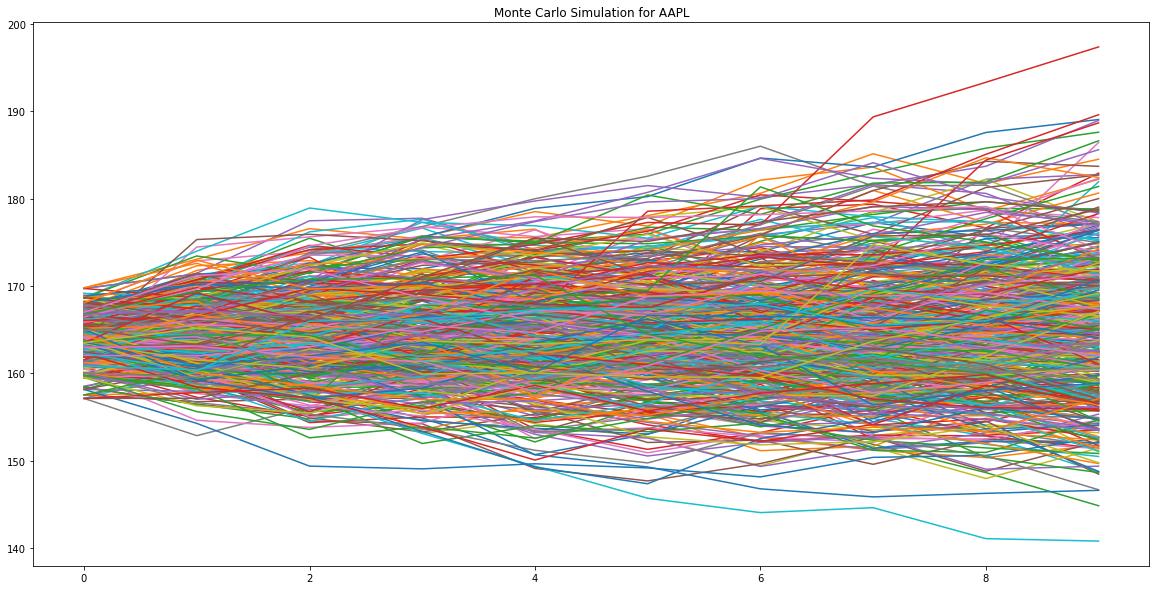

The starting closing price at the end of this period was 163.98
The expected return on AAPL is 0.008123622848446367 and the closing price will be between             148.91155127683365 and 181.7126720725428 with 95% confidence in the next 10 trading days
The starting closing price at the end of this period was 163.98
The expected return on AAPL is 0.008123622848446367 and the closing price will be between             157.11183147576094 and 173.5123918736155 with 67% confidence in the next 10 trading days


In [141]:
plot_MC('AAPL', '2021-03-01', '2022-03-20')

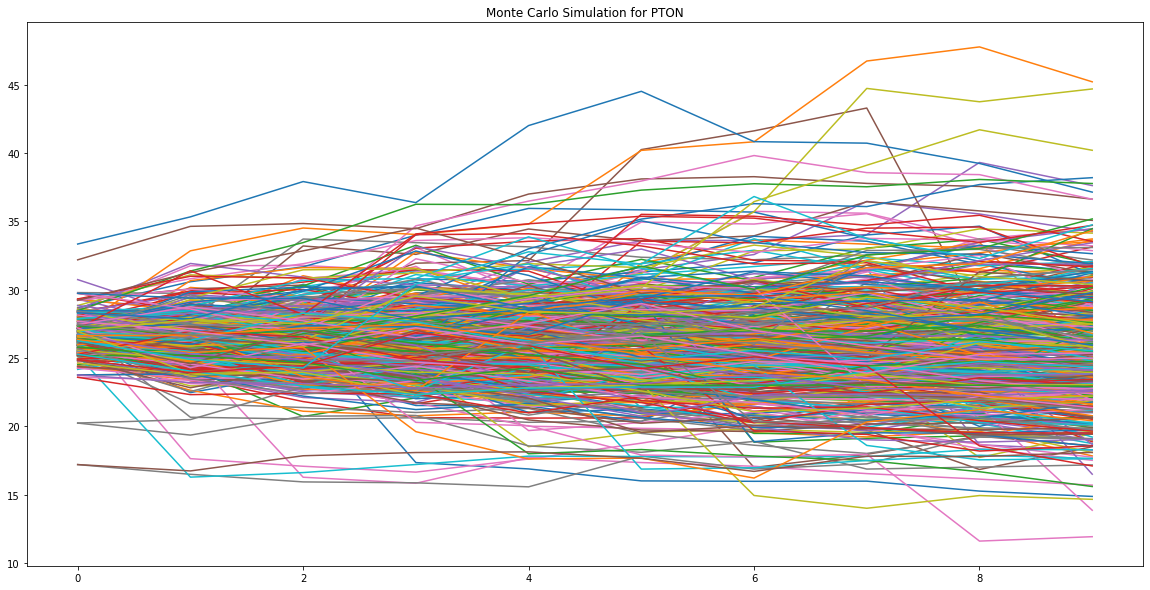

The starting closing price at the end of this period was 26.62
The expected return on PTON is -0.04354791488698322 and the closing price will be between             16.61517537903247 and 34.30633363238455 with 95% confidence in the next 10 trading days
The starting closing price at the end of this period was 26.62
The expected return on PTON is -0.04354791488698322 and the closing price will be between             21.037964942370486 and 29.88354406904653 with 67% confidence in the next 10 trading days


In [142]:
plot_MC('PTON', '2021-03-01', '2022-03-20')

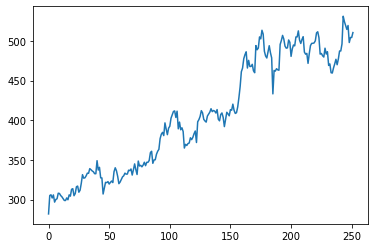

In [83]:
plt.plot(current_price_history)

In [80]:
df_ticker['MSFT']['close']

2020-03-09    150.62
2020-03-10    160.92
2020-03-11    153.63
2020-03-12    139.06
2020-03-13    158.83
               ...  
2022-03-02    300.19
2022-03-03    295.92
2022-03-04    289.86
2022-03-07    278.91
2022-03-08    275.85
Name: close, Length: 505, dtype: float64

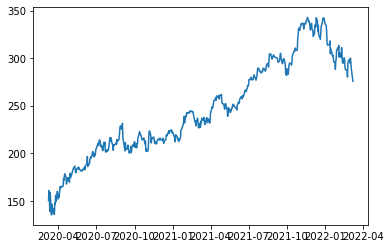

In [81]:
plt.plot(df_ticker['MSFT']['close'])

In [24]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.174118  0.397775
  2  0.518340  0.275103
b 1  0.237197  0.082038
  2  0.048290  0.934681

In [18]:
micolumns = pd.MultiIndex.from_tuples(
    [("MSFT", "close")], names=["lvl0", "lvl1"]
)
micolumns

MultiIndex([('MSFT', 'close')],
           names=['lvl0', 'lvl1'])

In [23]:
miindex

MultiIndex([('A0', 'B0', 'C0', 'D0'),
            ('A0', 'B0', 'C0', 'D1'),
            ('A0', 'B0', 'C1', 'D0'),
            ('A0', 'B0', 'C1', 'D1'),
            ('A0', 'B0', 'C2', 'D0'),
            ('A0', 'B0', 'C2', 'D1'),
            ('A0', 'B0', 'C3', 'D0'),
            ('A0', 'B0', 'C3', 'D1'),
            ('A0', 'B1', 'C0', 'D0'),
            ('A0', 'B1', 'C0', 'D1'),
            ('A0', 'B1', 'C1', 'D0'),
            ('A0', 'B1', 'C1', 'D1'),
            ('A0', 'B1', 'C2', 'D0'),
            ('A0', 'B1', 'C2', 'D1'),
            ('A0', 'B1', 'C3', 'D0'),
            ('A0', 'B1', 'C3', 'D1'),
            ('A1', 'B0', 'C0', 'D0'),
            ('A1', 'B0', 'C0', 'D1'),
            ('A1', 'B0', 'C1', 'D0'),
            ('A1', 'B0', 'C1', 'D1'),
            ('A1', 'B0', 'C2', 'D0'),
            ('A1', 'B0', 'C2', 'D1'),
            ('A1', 'B0', 'C3', 'D0'),
            ('A1', 'B0', 'C3', 'D1'),
            ('A1', 'B1', 'C0', 'D0'),
            ('A1', 'B1', 'C0', 'D1'),
            

In [28]:
micolumns = pd.MultiIndex.from_tuples(
    [("a", "foo"), ("a", "bar"), ("b", "foo"), ("b", "bah")], names=["lvl0", "lvl1"]
)
micolumns

MultiIndex([('a', 'foo'),
            ('a', 'bar'),
            ('b', 'foo'),
            ('b', 'bah')],
           names=['lvl0', 'lvl1'])

In [30]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])

# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      26.0  36.1  31.0  34.6  53.0  38.5
     2      22.0  38.0  37.0  36.7  53.0  37.6
2014 1      35.0  35.5  46.0  36.1  46.0  36.7
     2      38.0  35.7  44.0  34.3  59.0  36.9

In [27]:
def mklbl(prefix, n):
    return ["%s%s" % (prefix, i) for i in range(n)]


miindex = pd.MultiIndex.from_product(
    [mklbl("A", 1), mklbl("B", 1), mklbl("C", 4), mklbl("D", 2)]
)


micolumns = pd.MultiIndex.from_tuples(
    [("a", "foo"), ("a", "bar"), ("b", "foo"), ("b", "bah")], names=["lvl0", "lvl1"]
)


dfmi = (
    pd.DataFrame(
        np.arange(len(miindex) * len(micolumns)).reshape(
            (len(miindex), len(micolumns))
        ),
        index=miindex,
        columns=micolumns,
    )
    .sort_index()
    .sort_index(axis=1)
)
dfmi


lvl0          a       b    
lvl1        bar foo bah foo
A0 B0 C0 D0   1   0   3   2
         D1   5   4   7   6
      C1 D0   9   8  11  10
         D1  13  12  15  14
      C2 D0  17  16  19  18
         D1  21  20  23  22
      C3 D0  25  24  27  26
         D1  29  28  31  30

In [16]:
df = pd.DataFrame(np.random.randn(3, 8), index=["A", "B", "C"], columns=index)
df

NameError: name 'index' is not defined

### The MCForecastTools Library at a Glance

In [6]:
# Print the documentation of the MCSimulation module of the MCForecastTools library
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [7]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import os
import alpaca_trade_api as tradeapi
import datetime as dt
import pytz

class MCSimulation:
    """
    A Python class for runnning Monte Carlo simulation on portfolio price data. 
    
    ...
    
    Attributes
    ----------
    portfolio_data : pandas.DataFrame
        portfolio dataframe
    weights: list(float)
        portfolio investment breakdown
    nSim: int
        number of samples in simulation
    nTrading: int
        number of trading days to simulate
    simulated_return : pandas.DataFrame
        Simulated data from Monte Carlo
    confidence_interval : pandas.Series
        the 95% confidence intervals for simulated final cumulative returns
        
    """
    
    def __init__(self, portfolio_data, weights="", num_simulation=1000, num_trading_days=252):
        """
        Constructs all the necessary attributes for the MCSimulation object.

        Parameters
        ----------
        portfolio_data: pandas.DataFrame
            DataFrame containing stock price information from Alpaca API
        weights: list(float)
            A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
        num_simulation: int
            Number of simulation samples. DEFAULT: 1000 simulation samples
        num_trading_days: int
            Number of trading days to simulate. DEFAULT: 252 days (1 year of business days)
        """
        
        # Check to make sure that all attributes are set
        if not isinstance(portfolio_data, pd.DataFrame):
            raise TypeError("portfolio_data must be a Pandas DataFrame")
            
        # Set weights if empty, otherwise make sure sum of weights equals one.
        if weights == "":
            num_stocks = len(portfolio_data.columns.get_level_values(0).unique())
            weights = [1.0/num_stocks for s in range(0,num_stocks)]
        else:
            if round(sum(weights),2) < .99:
                raise AttributeError("Sum of portfolio weights must equal one.")
        
        # Calculate daily return if not within dataframe
        if not "daily_return" in portfolio_data.columns.get_level_values(1).unique():
            close_df = portfolio_data['close'].pct_change()
            tickers = portfolio_data.columns.get_level_values(0).unique()
            column_names = [(x,"daily_return") for x in tickers]
            close_df.columns = pd.MultiIndex.from_tuples(column_names)
            portfolio_data = portfolio_data.merge(close_df,left_index=True,right_index=True).reindex(columns=tickers,level=0)    
        
        # Set class attributes
        self.portfolio_data = portfolio_data
        self.weights = weights
        self.nSim = num_simulation
        self.nTrading = num_trading_days
        self.simulated_return = ""
        
    def calc_cumulative_return(self):
        """
        Calculates the cumulative return of a stock over time using a Monte Carlo simulation (Brownian motion with drift).

        """
        
        # Get closing prices of each stock
        last_prices = self.portfolio_data.xs('close',level=1,axis=1)[-1:].values.tolist()[0]
        
        # Calculate the mean and standard deviation of daily returns for each stock
        daily_returns = self.portfolio_data.xs('daily_return',level=1,axis=1)
        mean_returns = daily_returns.mean().tolist()
        std_returns = daily_returns.std().tolist()
        
        # Initialize empty Dataframe to hold simulated prices
        portfolio_cumulative_returns = pd.DataFrame()
        
        # Run the simulation of projecting stock prices 'nSim' number of times
        for n in range(self.nSim):
        
            if n % 10 == 0:
                print(f"Running Monte Carlo simulation number {n}.")
        
            # Create a list of lists to contain the simulated values for each stock
            simvals = [[p] for p in last_prices]
    
            # For each stock in our data:
            for s in range(len(last_prices)):

                # Simulate the returns for each trading day
                for i in range(self.nTrading):
        
                    # Calculate the simulated price using the last price within the list
                    simvals[s].append(simvals[s][-1] * (1 + np.random.normal(mean_returns[s], std_returns[s])))
    
            # Calculate the daily returns of simulated prices
            sim_df = pd.DataFrame(simvals).T.pct_change()
    
            # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
            sim_df = sim_df.dot(self.weights)
    
            # Calculate the normalized, cumulative return series
            portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
        
        # Set attribute to use in plotting
        self.simulated_return = portfolio_cumulative_returns
        
        # Calculate 95% confidence intervals for final cumulative returns
        self.confidence_interval = portfolio_cumulative_returns.iloc[-1, :].quantile(q=[0.025, 0.975])
        
        return portfolio_cumulative_returns
    
    def plot_simulation(self):
        """
        Visualizes the simulated stock trajectories using calc_cumulative_return method.

        """ 
        
        # Check to make sure that simulation has run previously. 
        if not isinstance(self.simulated_return,pd.DataFrame):
            self.calc_cumulative_return()
            
        # Use Pandas plot function to plot the return data
        plot_title = f"{self.nSim} Simulations of Cumulative Portfolio Return Trajectories Over the Next {self.nTrading} Trading Days."
        return self.simulated_return.plot(legend=None,title=plot_title)
    
    def plot_distribution(self):
        """
        Visualizes the distribution of cumulative returns simulated using calc_cumulative_return method.

        """
        
        # Check to make sure that simulation has run previously. 
        if not isinstance(self.simulated_return,pd.DataFrame):
            self.calc_cumulative_return()
        
        # Use the `plot` function to create a probability distribution histogram of simulated ending prices
        # with markings for a 95% confidence interval
        plot_title = f"Distribution of Final Cumuluative Returns Across All {self.nSim} Simulations"
        plt = self.simulated_return.iloc[-1, :].plot(kind='hist', bins=10,density=True,title=plot_title)
        plt.axvline(self.confidence_interval.iloc[0], color='r')
        plt.axvline(self.confidence_interval.iloc[1], color='r')
        return plt
    
    def summarize_cumulative_return(self):
        """
        Calculate final summary statistics for Monte Carlo simulated stock data.
        
        """
        
        # Check to make sure that simulation has run previously. 
        if not isinstance(self.simulated_return,pd.DataFrame):
            self.calc_cumulative_return()
            
        metrics = self.simulated_return.iloc[-1].describe()
        ci_series = self.confidence_interval
        ci_series.index = ["95% CI Lower","95% CI Upper"]
        return metrics.append(ci_series)

### Simulate five year portfolio growth using Monte Carlo simulation

In [8]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [1],
    num_simulation = 500,
    num_trading_days = 252*5
)

IndexError: Too many levels: Index has only 1 level, not 2

In [40]:
# Printing the simulation input data
MC_fiveyear.portfolio_data.head()

NameError: name 'MC_fiveyear' is not defined

In [8]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011183,1.003640,0.995387,1.003003,1.002283,0.991261,0.993851,1.004959,0.995040,1.005974,...,0.987744,0.999161,1.001092,1.015067,0.991717,0.993505,1.005455,0.992440,1.014116,0.996327
2,1.010516,1.013914,0.986976,0.994755,0.988325,0.997444,0.982326,1.005981,1.001946,1.013416,...,0.988858,1.002668,1.005572,1.002438,1.004596,0.979046,1.003859,1.007666,1.025195,0.991248
3,1.020538,1.014956,0.995326,0.971891,1.002391,1.008548,0.998577,1.009823,1.023618,1.006224,...,1.007736,1.009974,1.001745,1.003470,1.013095,0.996308,1.013724,1.001729,1.010593,0.994025
4,1.008357,1.015980,0.990913,0.967137,0.995449,1.011326,1.007435,1.013989,1.032095,0.995030,...,0.998612,1.015970,0.978090,1.026153,1.020178,1.001752,1.022909,0.996071,1.014151,0.999556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.320943,3.625409,3.503447,1.085580,1.246446,1.439788,1.434845,2.251037,2.848876,1.858250,...,3.062218,2.144138,1.879846,2.887162,1.406283,4.133657,1.443959,1.986593,1.575785,4.102522
1257,2.298058,3.670266,3.450661,1.093163,1.257378,1.437472,1.410902,2.249188,2.823875,1.860901,...,3.094995,2.138825,1.869621,2.874659,1.434135,4.148609,1.428483,1.990941,1.552572,4.075057
1258,2.333132,3.619737,3.421655,1.104514,1.269939,1.423639,1.428474,2.263686,2.866994,1.865590,...,3.090344,2.174377,1.872586,2.897630,1.441873,4.162761,1.412225,1.969911,1.548777,4.108532
1259,2.314822,3.675878,3.392552,1.120610,1.267853,1.433143,1.444003,2.287083,2.925508,1.881977,...,3.114467,2.166647,1.836733,2.940865,1.454774,4.256929,1.408203,1.939488,1.550266,4.120576


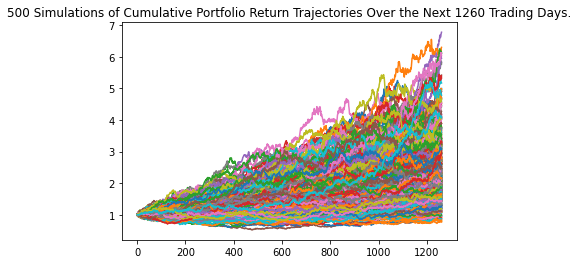

In [9]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

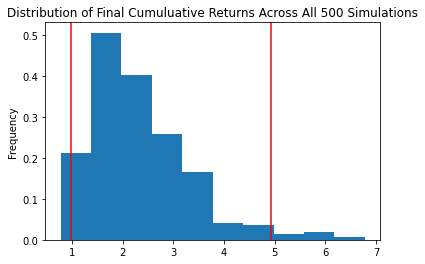

In [10]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

In [11]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              2.325262
std               0.990804
min               0.775205
25%               1.606110
50%               2.129262
75%               2.787852
max               6.779987
95% CI Lower      0.987389
95% CI Upper      4.934141
Name: 1260, dtype: float64


In [12]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within in the range of $9873.89 and $49341.41
